In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip -q "/content/drive/MyDrive/LungCancerAiraHarman/lungcancerdataset.zip"
print("Unzipping done")

Unzipping done


In [ ]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from keras.layers.normalization.batch_normalization import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
print("Libraries added")

Libraries added


In [ ]:
INIT_LR = 1e-3
EPOCHS = 10
BS = 8
Lungdataset2 = "/content/lungcancerdataset"
print("done")

done


In [ ]:
args={}
args["Lungdataset2"]=Lungdataset2
print("done")

done


In [ ]:
import numpy as np
import cv2
iPaths = list(paths.list_images(args["Lungdataset2"]))  #image paths
data = []
labels = []
for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2]   #split the image paths
    image = cv2.imread(iPath)
   # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert images into RGB Channel
  #  image = cv2.resize(image, (224, 224))  #Resizing the images
    data.append(image)
    labels.append(label)
data = np.array(data) / 1
labels = np.array(labels)
print("done")

<ipython-input-13-2fadde041e31>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data) / 1


TypeError: ignored

In [ ]:
import os
Data_Dir = "lungcancerdataset//"
print("done")

done


In [ ]:
Cimages = os.listdir(Data_Dir+"cancer")
Nimages = os.listdir(Data_Dir+"noncancer")
print("done")

done


Normal Brain MRIs Vs Brain Tumor MRIs


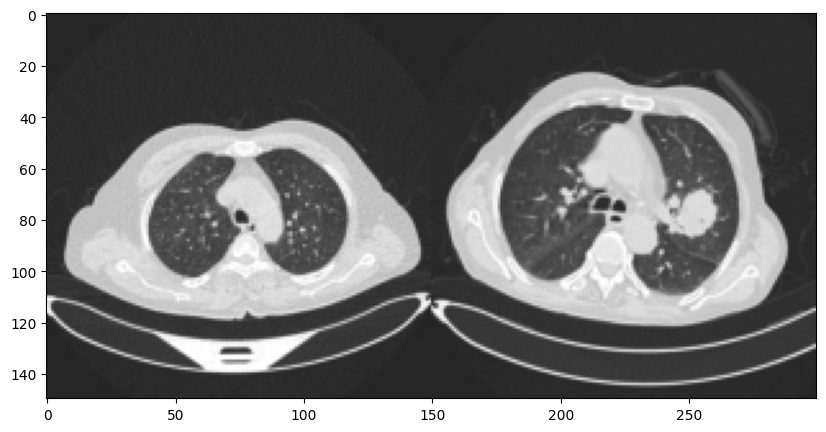

Normal Brain MRIs Vs Brain Tumor MRIs


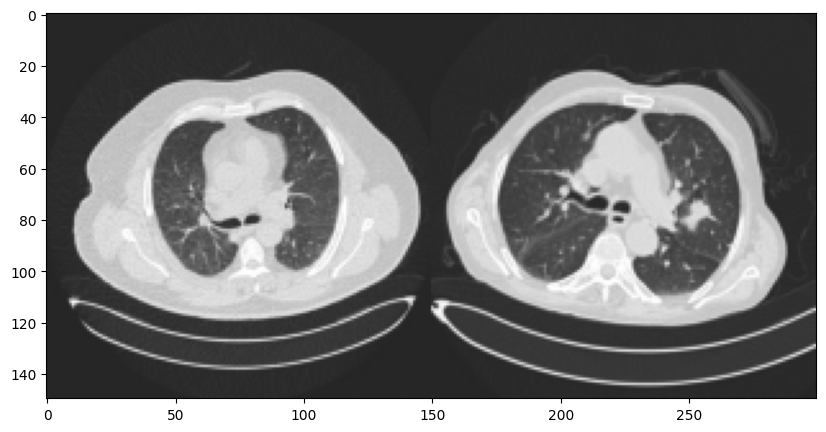

Normal Brain MRIs Vs Brain Tumor MRIs


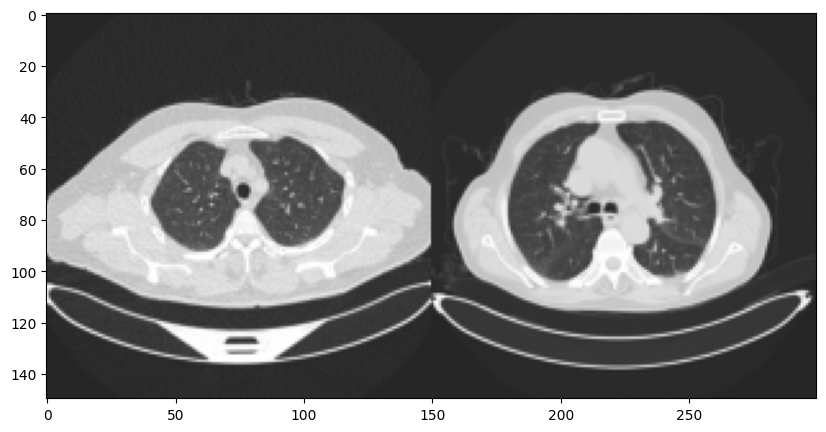

Normal Brain MRIs Vs Brain Tumor MRIs


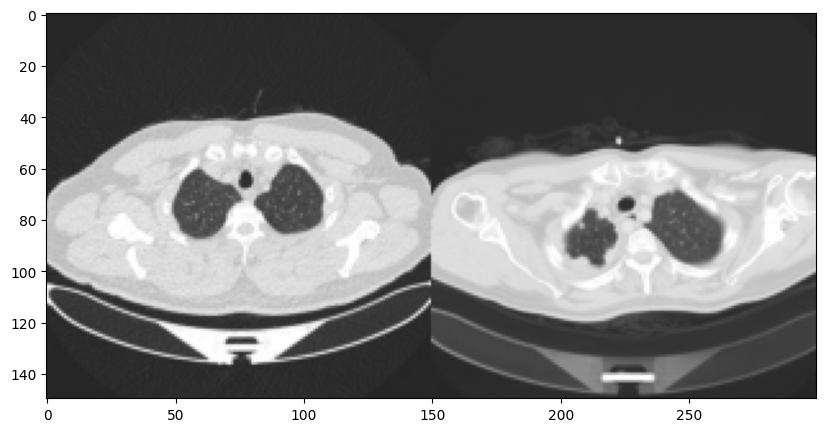

Normal Brain MRIs Vs Brain Tumor MRIs


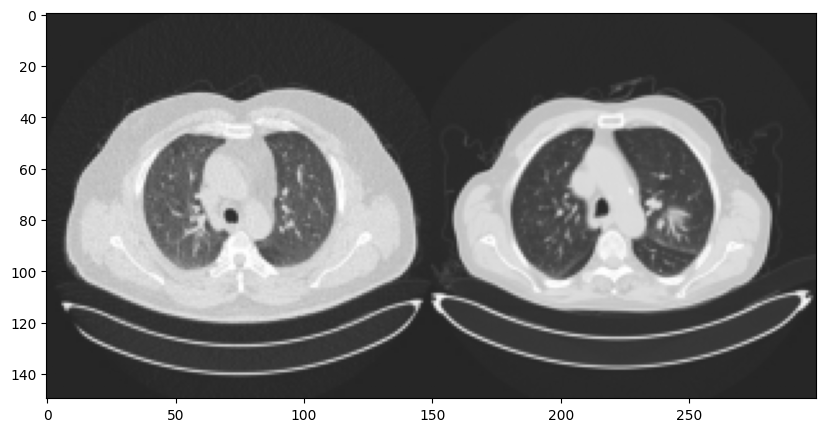

In [ ]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np
def plotter(i):
    normal = cv2.imread(Data_Dir+"noncancer//"+Nimages[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    coronavirus = cv2.imread(Data_Dir+"cancer//"+Cimages[i])
    coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, coronavirus), axis=1)
    print("Normal Brain MRIs Vs Brain Tumor MRIs")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

In [ ]:
LB = LabelBinarizer()  #Initialize label binarizer
labels = LB.fit_transform(labels)
labels = to_categorical(labels); print(labels)
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels,
    test_size=0.30, stratify=labels, random_state=42)

trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
bModel = DenseNet169(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))  #base_Model
hModel = bModel.output #head_Model
hModel = AveragePooling2D(pool_size=(4, 4))(hModel)
hModel = Flatten(name="flatten")(hModel)
hModel = Dense(64, activation="relu")(hModel)
hModel = Dropout(0.5)(hModel)
hModel = Dense(2, activation="softmax")(hModel)
model = Model(inputs=bModel.input, outputs=hModel)
for layer in bModel.layers:
    layer.trainable = False

51877672/51877672 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


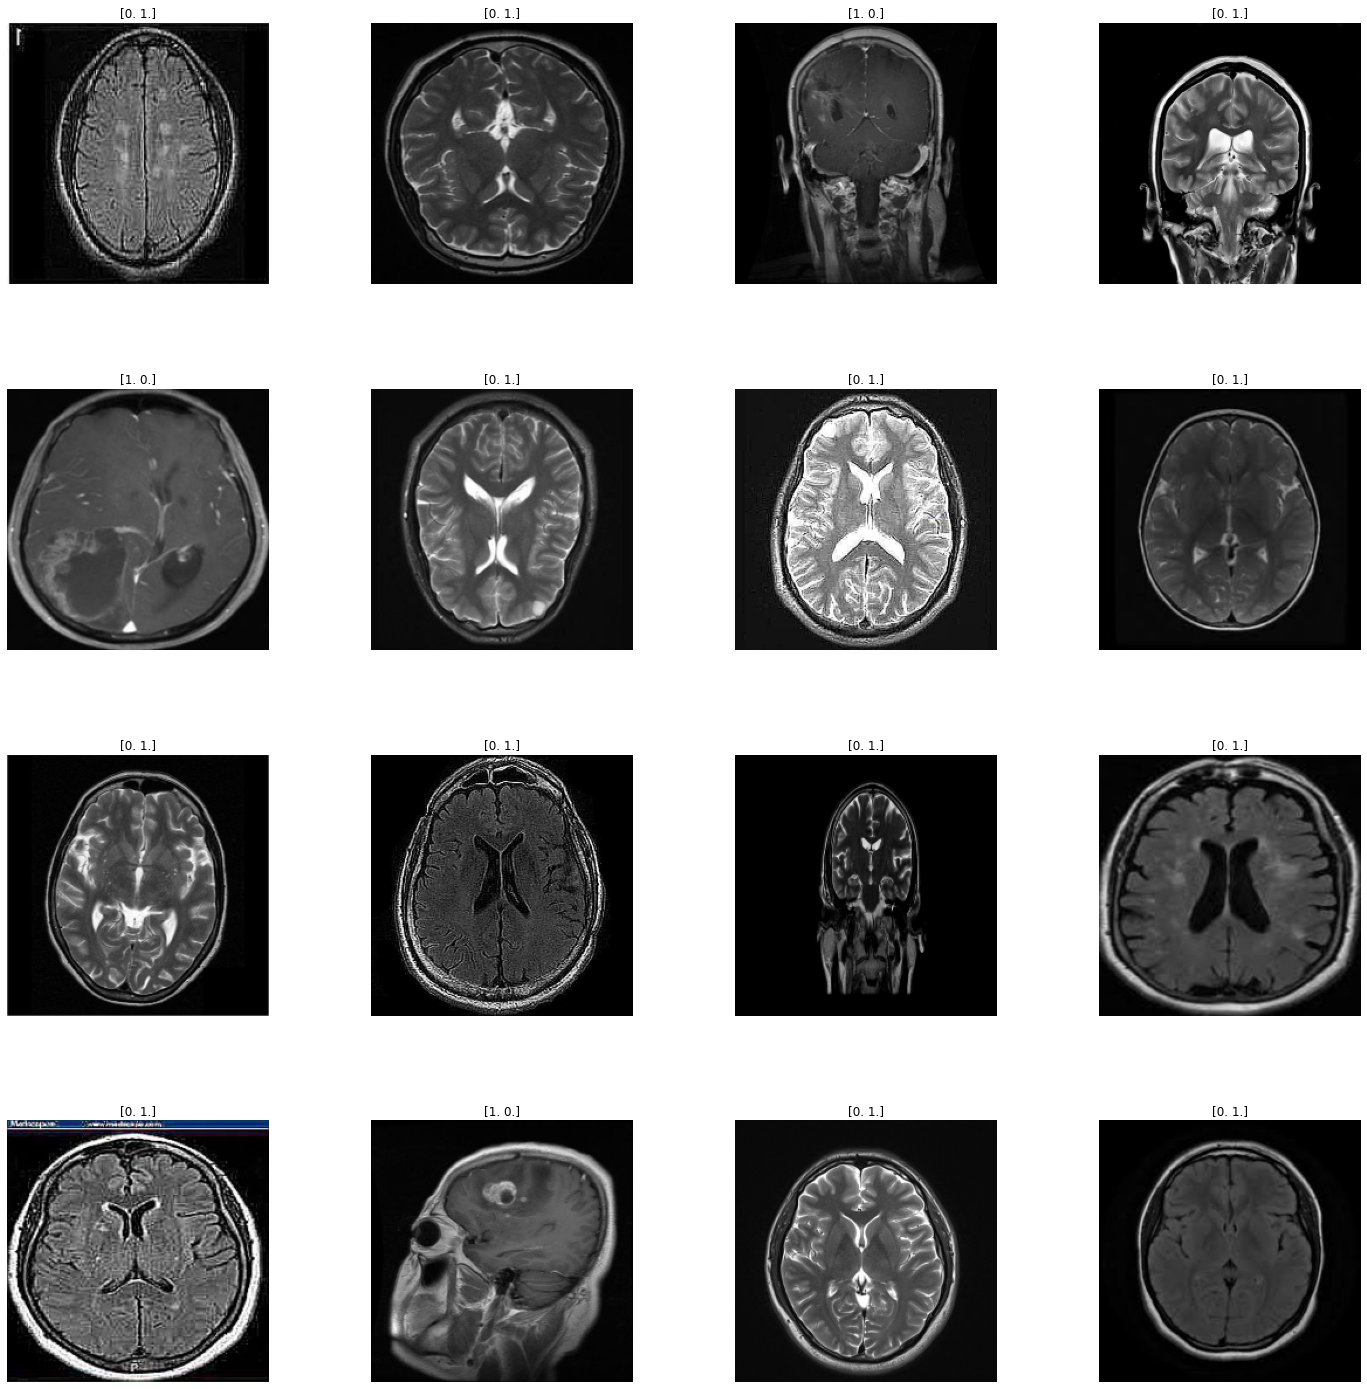

In [ ]:
W_grid = 4 #width
L_grid = 4 #lenth
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25)) #subplots
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
print("Compiling Starts")
R = model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Compiling Starts


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10
175/175 [==============================] - 1268s 7s/step - loss: 0.5570 - accuracy: 0.7543 - val_loss: 0.4159 - val_accuracy: 0.8833
Epoch 2/10
175/175 [==============================] - 1256s 7s/step - loss: 0.3904 - accuracy: 0.8607 - val_loss: 0.3138 - val_accuracy: 0.8900
Epoch 3/10
175/175 [==============================] - 1252s 7s/step - loss: 0.3141 - accuracy: 0.8829 - val_loss: 0.2890 - val_accuracy: 0.8883
Epoch 4/10
175/175 [==============================] - 1249s 7s/step - loss: 0.2714 - accuracy: 0.9079 - val_loss: 0.2765 - val_accuracy: 0.8917
Epoch 5/10
175/175 [==============================] - 1247s 7s/step - loss: 0.2514 - accuracy: 0.9129 - val_loss: 0.2219 - val_accuracy: 0.9150
Epoch 6/10
175/175 [==============================] - 1245s 7s/step - loss: 0.2233 - accuracy: 0.9150 - val_loss: 0.2088 - val_accuracy: 0.9233
Epoch 7/10
175/175 [==============================] - 1241s 7s/step - loss: 0.2206 - accuracy: 0.9200 - val_loss: 0.2077 - val_accuracy:

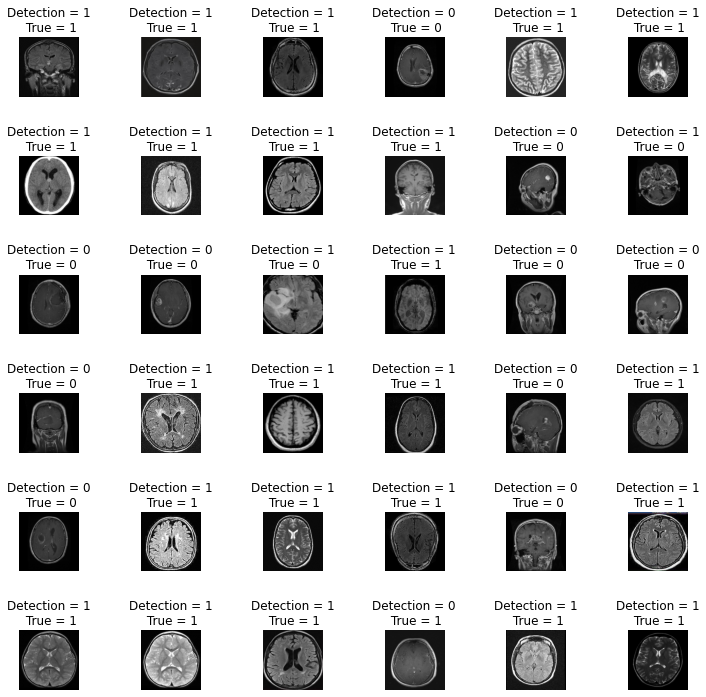

In [ ]:
L = 6
W = 6
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Detection = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1)   

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred,target_names=LB.classes_))

                 precision    recall  f1-score   support

BrainTumorSmall       0.95      0.87      0.91       240
   HealthySmall       0.92      0.97      0.94       360

       accuracy                           0.93       600
      macro avg       0.93      0.92      0.92       600
   weighted avg       0.93      0.93      0.93       600



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.argmax(axis=1),y_pred)

0.9283333333333333

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))


[[208  32]
 [ 11 349]]
acc: 0.9283
sensitivity: 0.8667
specificity: 0.9694


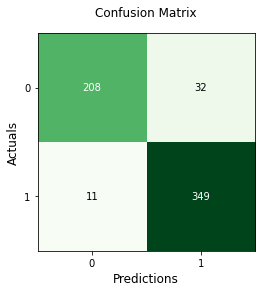

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(4, 4), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

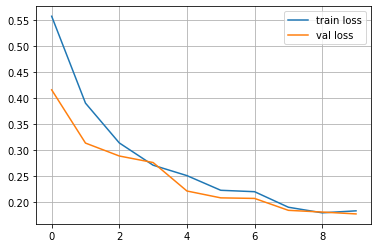

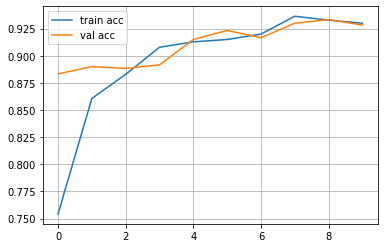

In [ ]:
# plot the loss
plt.grid(True)
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.grid(True)
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()



In [ ]:
model.save('BT_model.h5')
print("model saved")

model saved


Prediction: Brain Tumor Detected


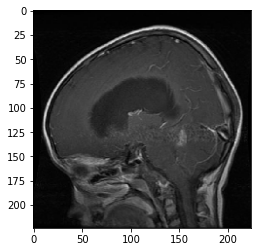

In [ ]:
import tensorflow as tf 
from keras.preprocessing import image
#from keras.models import load_model
model = tf.keras.models.load_model('BT_model.h5')
from keras.applications.densenet import preprocess_input
#img = image.load_img('Data/Covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png', target_size=(224, 224)) #insert a random covid-19 x-ray image
img = image.load_img('/content/lungcancerdataset/cancer/Malignant case (211).jpg', target_size=(224, 224)) #insert a random covid-19 x-ray image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
   print('Prediction: Normal Brain')
else:
  print('Prediction: Brain Tumor Detected')
 

Prediction: Normal Brain


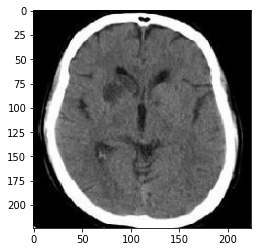

In [ ]:
#img = image.load_img('Data/Normal/IM-0162-0001.jpeg', target_size=(224, 224)) #insert a random normal x-ray image
img = image.load_img('/content/lungcancerdataset/noncancer/Normal case (117).jpg', target_size=(224, 224)) #insert a random normal x-ray image

imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal Brain')
else:
  print('Prediction: Brain Tumor Detected')

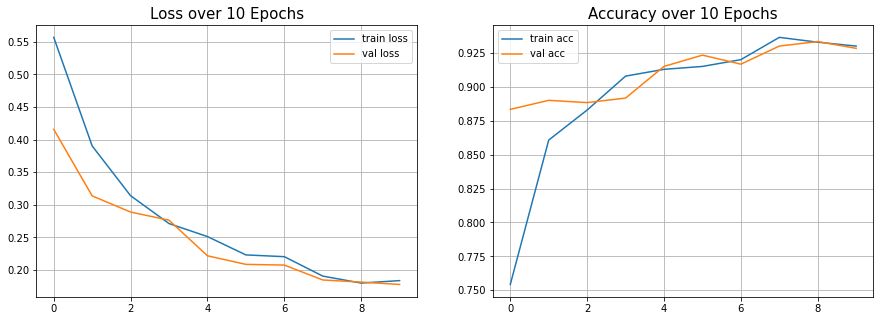

<Figure size 432x288 with 0 Axes>

In [ ]:
#running code 
import matplotlib.pyplot as plt

epochs=EPOCHS
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(R.history['loss'], label='train loss')
plt.plot( R.history['val_loss'], label='val loss')
plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
plt.legend()
plt.grid(True)
plt.savefig('LossVal_loss')

# plot the accuracy
plt.subplot(122)
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('Val_Accuracy')
